In [4]:
import pandas as pd
import os

In [5]:
folder_path = os.path.join(os.getcwd(), 'dataset')

In [6]:
class_labels = {
    'company_business_and_strategy.xlsx': 'Company Business and Strategy',
    'purely_personal.xlsx': 'Purely Personal',
    'personal_in_professional_context.xlsx': 'Personal in a Professional Context',
    'logistic_arrangements.xlsx': 'Logistic Arrangements',
    'employment_arrangements.xlsx': 'Employment Arrangements',
    'document_editing_checking.xlsx': 'Document Editing and Checking'
}

In [7]:
dfs = []

In [8]:
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        # Read the Excel file into a DataFrame without headers
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, header=None)
        
        # Add the label column based on the file name
        class_label = class_labels.get(file_name)
        df['class'] = class_label
        
        # Append the DataFrame to the list
        dfs.append(df)

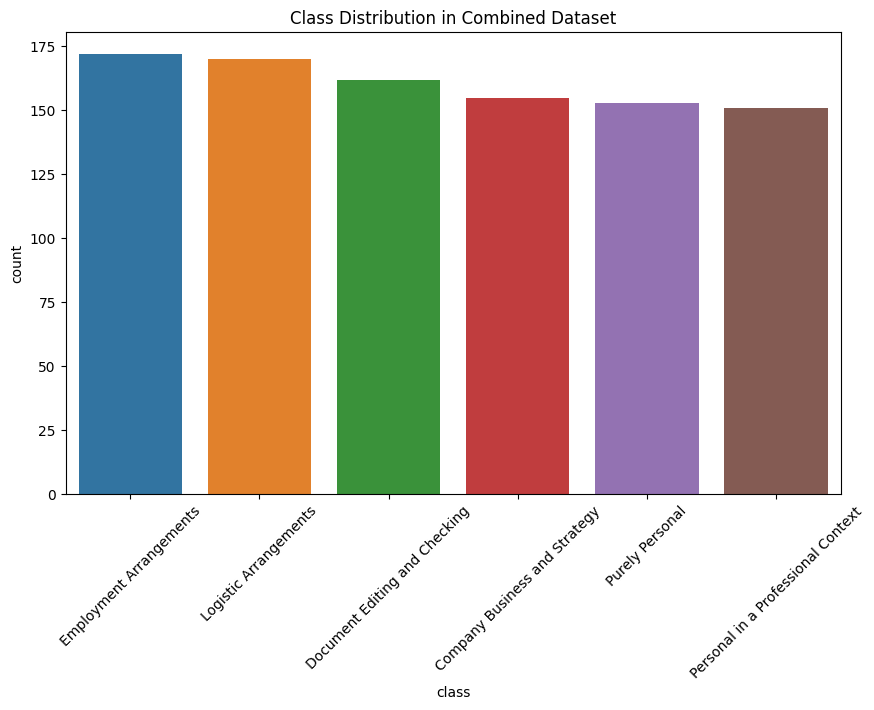

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='class', order=combined_df['class'].value_counts().index)
plt.title('Class Distribution in Combined Dataset')
plt.xticks(rotation=45)
plt.show()


In [9]:
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.columns = ['date', 'subject', 'to','from', 'content', 'class']


In [10]:
combined_df

,date,subject,to,from,content,class
0,2024-10-15,Q4 Business Strategy Review,team@company.com,ceo@company.com,"Dear Team, please join our quarterly meeting t...",Company Business and Strategy
1,2024-10-18,Market Expansion Proposal,board@company.com,marketing@company.com,We’re considering expanding into new regions n...,Company Business and Strategy
2,2024-11-01,Competitive Analysis Report Review,exec@company.com,strategy@company.com,Attached is the latest report on competitors’ ...,Company Business and Strategy
3,2024-11-05,Strategy Workshop Confirmation,dept-heads@company.com,strategy@company.com,This is to confirm our workshop dates. We aim ...,Company Business and Strategy
4,2024-11-08,Product Line Repositioning Discussion,product@company.com,exec@company.com,We need to discuss product line repositioning ...,Company Business and Strategy
...,...,...,...,...,...,...
958,2025-12-16,Weekend Getaway to the Mountains,neeraj.rao@gmail.com,karishma.das@gmail.com,"Hi Neeraj, I’m planning a weekend getaway to t...",Purely Personal
959,2025-12-19,Potluck Lunch at My Place,amit.sharma@gmail.com,shalini.patel@gmail.com,"Hi Amit, I’m organizing a potluck lunch this S...",Purely Personal
960,2025-12-22,Winter Wonderland: Ice Skating Plans,tanvi.singh@gmail.com,ankit.kumar@gmail.com,"Hi Tanvi, there’s an ice skating rink that jus...",Purely Personal
961,2025-12-25,Hosting a Cozy Christmas Dinner,priyanka.mehra@gmail.com,rajat.das@gmail.com,"Hi Priyanka, I’m hosting a cozy Christmas dinn...",Purely Personal


In [15]:
combined_df.to_csv('combined_dataset.csv', index=False)

In [14]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [16]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()

# List of stopwords in English
stop_words = set(stopwords.words('english'))

In [18]:
def preprocess_text(text):
    # Step 1: Remove text in square brackets (like [IMAGE])
    text = re.sub(r'\[.*?\]', '', text)
    
    # Step 2: Remove email addresses and URLs (optional, if needed)
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    
    # Step 3: Remove extra whitespace, newlines, tabs
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip()  # Remove leading and trailing spaces
    
    # Step 4: Remove special characters, digits, and unnecessary punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters (special chars and digits)
    
    # Step 5: Convert to lowercase
    text = text.lower()
    
    # Step 6: Tokenization (break text into words)
    tokens = word_tokenize(text)
    
    # Step 7: Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Step 8: Lemmatization (reduce words to their base form)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Return the preprocessed text as a space-separated string
    return ' '.join(tokens)

In [19]:
combined_df['content'] = combined_df['content'].apply(preprocess_text)


In [20]:
le = LabelEncoder()
combined_df['class'] = le.fit_transform(combined_df['class'])

In [21]:
! "C:/Program Files/Python311/python.exe" -m pip install transformers scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: C:\Program Files\Python311\python.exe -m pip install --upgrade pip


In [22]:

import torch
from torch import nn
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [23]:
# BERT + BiLSTM Model Class
class BERT_BiLSTM(nn.Module):
    def __init__(self, hidden_dim, num_classes):
        super(BERT_BiLSTM, self).__init__()
        
        # Load pre-trained BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
        # BiLSTM layer
        self.lstm = nn.LSTM(input_size=self.bert.config.hidden_size,
                            hidden_size=hidden_dim,
                            num_layers=1,
                            bidirectional=True,
                            batch_first=True)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim * 2, num_classes)  # *2 for bidirectional
        
    def forward(self, input_ids, attention_mask):
        # Get BERT embeddings
        bert_output = self.bert(input_ids, attention_mask=attention_mask)
        x = bert_output.last_hidden_state
        
        # Pass through BiLSTM
        lstm_out, _ = self.lstm(x)
        
        # Take the output from the last time step for classification
        lstm_out = lstm_out[:, -1, :]  # Last time step
        output = self.fc(lstm_out)
        
        return output


In [29]:
# Load BERT tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [27]:
def encode_texts(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors='pt')


In [30]:
# Assuming combined_df is your DataFrame and the text is preprocessed
train_encodings = encode_texts(combined_df['content'].tolist())

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_encodings['input_ids'], combined_df['class'], test_size=0.2, random_state=42)


In [31]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt',
            return_attention_mask=True,
            return_token_type_ids=False
        )
        
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()
        
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [32]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# Prepare Dataset and DataLoader
train_texts, val_texts, train_labels, val_labels = train_test_split(
    combined_df['content'], combined_df['class'], test_size=0.2, random_state=42
)

train_dataset = TextDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_length=128)
val_dataset = TextDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [34]:
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [35]:
epochs = 1
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        
        optimizer.step()
    
    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Classification Report
    print(f'Epoch {epoch+1}/{epochs}')
    print(classification_report(all_labels, all_preds, target_names=le.classes_))

Epoch 1/1
                                    precision    recall  f1-score   support

     Company Business and Strategy       1.00      1.00      1.00        27
     Document Editing and Checking       0.97      1.00      0.99        35
           Employment Arrangements       0.92      0.97      0.95        37
             Logistic Arrangements       1.00      0.97      0.99        38
Personal in a Professional Context       0.95      0.74      0.83        27
                   Purely Personal       0.88      1.00      0.94        29

                          accuracy                           0.95       193
                         macro avg       0.95      0.95      0.95       193
                      weighted avg       0.96      0.95      0.95       193



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
